In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from scipy.stats import ttest_1samp
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp, t
from statsmodels.stats.power import TTestPower

Есть сеть кофейн, с высоким потоком клиентов. Каждый день сотни покупателей пользуются стандартными кассами для завершения своих покупок. Владельцы уверены, что их текущая система обслуживания является эффективной и что клиенты проводят в очереди у касс не более 3:50 минут. Однако, после нескольких жалоб клиентов на длительное ожидание, руководство решило провести детальный анализ времени ожидания, чтобы подтвердить или опровергнуть свою гипотезу и улучшить качество обслуживания.


---
**Задача:** Провести анализ среднего времени ожидания клиентов в очереди к стандартным кассам. Если будет выявлено, что среднее время ожидания превышает заявленные 3 минуты, предложить меры по оптимизации процесса обслуживания.

## Цель: анализ стандартных касс

---
Необходимо провести анализ среднего времени ожидания клиентов в процессе обслуживания на стандартных кассах. Под стандартной кассой понимается касса, где покупатель взаимодействует с кассиром для завершения покупки. Обслуживание на таких кассах осуществляется в следующем порядке:

1. Очередь: Покупатели стоят в очереди, ожидая своей очереди подойти к кассе.
2. Обслуживание кассиром: Покупатели передают свои товары кассиру, который сканирует или вручную вводит стоимость каждого товара.
3. Оплата: Покупатели оплачивают свои покупки через кассира, используя наличные деньги, банковские карты или другие методы оплаты.
4. Выдача чека: После оплаты покупатель получает чек и уходит с покупками.

---
Владелец кафе считает, что среднее время ожидания клиентов в очереди составляет не более 3 минут. Для проверки данной гипотезы необходимо провести оценку всей генеральной совокупности и применить статистические методы.

##Сбор данных для исследования
Процесс сбора данных для анализа:

1. В ходе исследования мы случайным образом сформировали выборку, которая позволила получить репрезентативные данные о клиентах кафе.

2. Случайный отбор гарантирует учёт множества факторов, таких как время суток и день недели, которые могут влиять на количество посетителей и их предпочтения. Если бы мы проводили отбор только в определённые часы или дни, результаты могли бы быть искажены и не отражать общую картину.

3. Такой подход делает результаты исследования более надёжными и обоснованными для всех клиентов кафе, а не только для определённой группы.

---

## Важные уточнения относительно данных

1. Каждое наблюдение в выборке времени ожидания является независимым и случайным. Это означает, что время ожидания одного клиента в очереди не влияет на время ожидания другого клиента.

2. Мы предполагаем, что время ожидания каждого клиента в очереди имеет одинаковое распределение, которое нам неизвестно.


У нас будет 2 выборки, одна выборки из 25 значений, а вторая из 500 значений.
3. Выборка состоит из 500 клиентов, что достаточно для оценки среднего времени ожидания с приемлемой точностью и проведения статистических тестов.

Данные выборки из 25 наблюдений: https://drive.google.com/file/d/1jdrwqIDYK_l51ZFhxsjK3qSrcUmJ2p52/view?usp=drive_link

Данные выборки из 500 наблюдений: https://drive.google.com/file/d/1R_O_EZ0Q-zt0QA_ZHoDJ5bz-cKiM3S3A/view?usp=sharing


In [2]:
# Загрузка данных
!gdown --id 1jdrwqIDYK_l51ZFhxsjK3qSrcUmJ2p52
!gdown --id 1R_O_EZ0Q-zt0QA_ZHoDJ5bz-cKiM3S3A

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1jdrwqIDYK_l51ZFhxsjK3qSrcUmJ2p52
To: /content/sample_25.csv
100% 472/472 [00:00<00:00, 2.83MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1R_O_EZ0Q-zt0QA_ZHoDJ5bz-cKiM3S3A
To: /content/sample_500.csv
100% 9.27k/9.27k [00:00<00:00, 21.9MB/s]


In [3]:
data_25 = pd.read_csv('/content/sample_25.csv', usecols=['sample_25']).squeeze()
data_500 = pd.read_csv('/content/sample_500.csv', usecols=['sample_500']).squeeze()

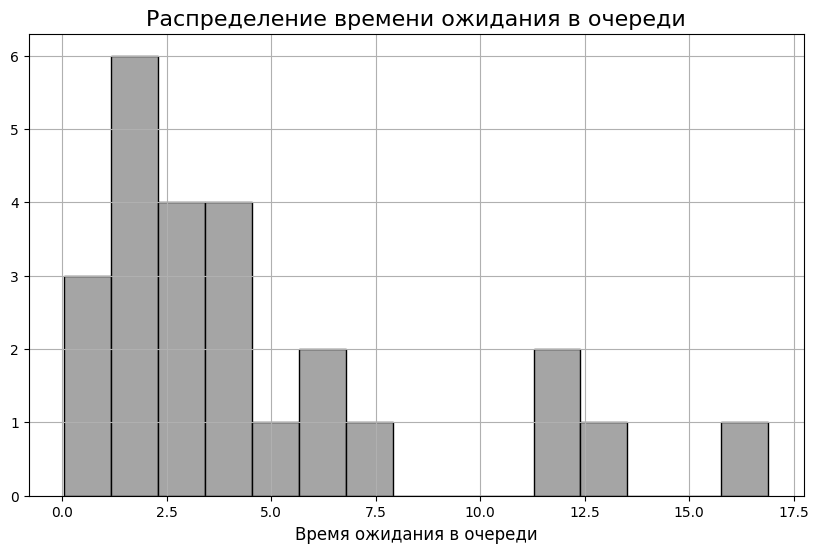

In [4]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.hist(data_25, bins=15, color='#A5A5A5', edgecolor='black', label='Распределние выборки')
plt.title('Распределение времени ожидания в очереди', fontsize=16)
plt.xlabel('Время ожидания в очереди', fontsize=12)
plt.show()

In [5]:
def float_to_min_sec(value):
    minutes = int(value)
    seconds = round((value - minutes) * 60)
    return f"{minutes}:{seconds:02d}"

float_to_min_sec(np.mean(data_25))

'4:43'

## Оценка среднего при маленькой выборке

Для применения $t$-оценки необходимо, чтобы выборка была нормально распределена, особенно если она невелика. В таких случаях есть два возможных подхода:

1. **Преобразование выборки.**  Можно попытаться преобразовать данные, чтобы привести их к нормальному распределению. Однако, учитывая, что выборка мала, преобразование может не привести к нормальному распределению и не всегда будет иметь значительный эффект.

2. **Использовать непараметрический метод.**  Если данные не являются нормальными и выборка мала, разумным подходом будет использование бутстрапирования. Этот метод не требует предположений о распределении данных и может использоваться для оценки среднего и других статистик без необходимости нормальности.


---
###  Основная идея бутстрапирования

Бутстрап — это метод статистической оценки, который позволяет аппроксимировать распределение статистики (например, выборочного среднего) на основе повторных выборок с возвращением из исходных данных.

Общий алгоритм для бутстрапирования:
- Сгенерирую $B$ бутстрап-выборок с возвращением из исходных данных.
Для каждой бутстрап-выборки буду считать среднее.

- Построю доверительный интервал для статистики, используя перцентили из полученного распределения бутстрап-оценок.

При уровне значимости $\alpha= .05$,

Перцентили = $(\alpha/2)$  и  $(1-\alpha/2)$

---


### Уровень статистической значимости

$\alpha$ - это мера того, насколько мы готовы принять риск ошибиться, делая выводы о генеральной совокупности на основе выборочных данных.

In [19]:
n_iterations = 100000
bootstrap_means = np.zeros(n_iterations)

for i in range(n_iterations):
  bootstrap_means[i] = np.mean(np.random.choice(data_25, size=20, replace=True))

lower_percentile = np.percentile(bootstrap_means, 2.5)
upper_percentile = np.percentile(bootstrap_means, 97.5)

lower_sec = round((lower_percentile-(lower_percentile//1))*60)/100
upper_sec = round((upper_percentile-(upper_percentile//1))*60)/100

CI_lower = (lower_percentile//1)+lower_sec
CI_upper = (upper_percentile//1)+upper_sec


print(f"95%-й доверительный интервал для среднего в минутах: ({CI_lower:.2f}, {CI_upper:.2f})")

95%-й доверительный интервал для среднего в минутах: (2.57, 6.46)


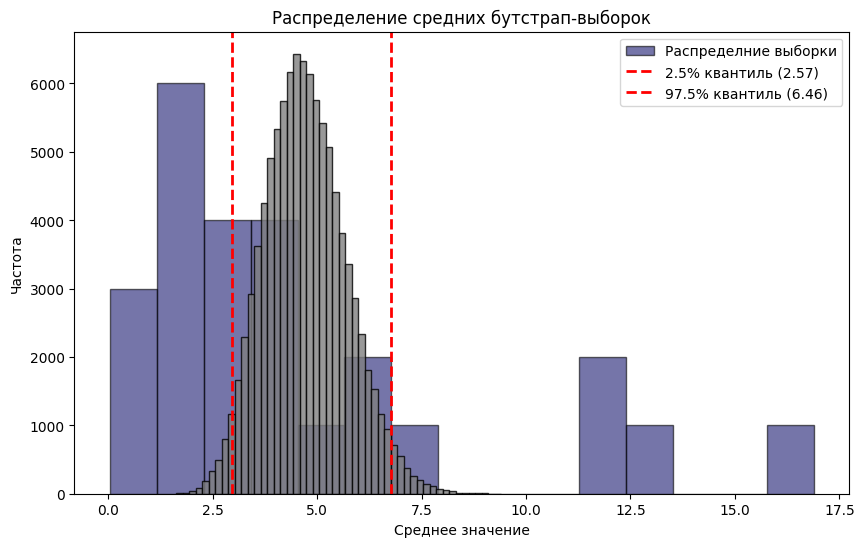

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(np.repeat(data_25, 1000), bins=15, color='#191970', alpha= 0.6,edgecolor='black', label='Распределние выборки')
plt.hist(bootstrap_means, bins=50, color='grey', edgecolor='black', alpha=0.8)
plt.axvline(lower_percentile, color='r', linestyle='dashed', linewidth=2, label=f'2.5% квантиль ({CI_lower:.2f})')
plt.axvline(upper_percentile, color='r', linestyle='dashed', linewidth=2, label=f'97.5% квантиль ({CI_upper:.2f})')
plt.title("Распределение средних бутстрап-выборок")
plt.xlabel("Среднее значение")
plt.ylabel("Частота")
plt.legend()
plt.show()

## Вывод

## Оценка среднего при достаточно большой выборке


В моем распоряжении имеется выборка большего объёма, что позволит мне провести более точные расчёты и проверить гипотезу о среднем значении генеральной совокупности.

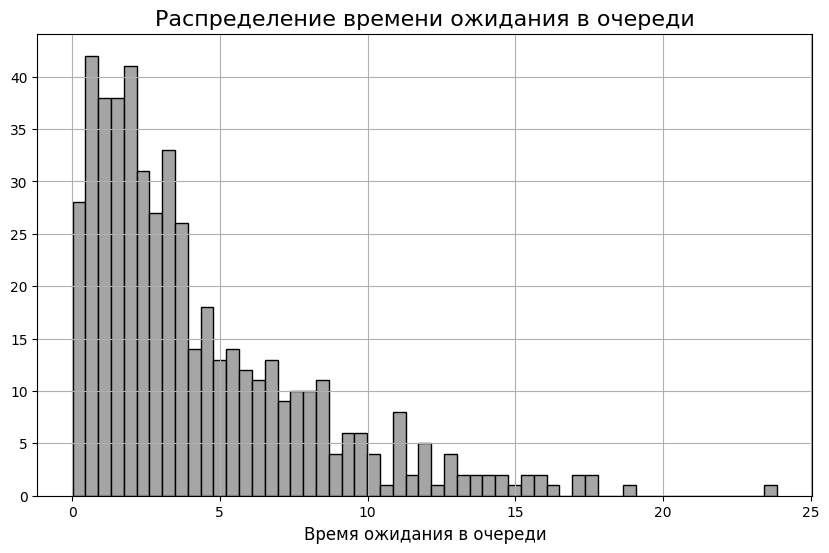

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(data_500, bins=55, color='#A5A5A5', edgecolor='black', label='Распределние выборки')
plt.title('Распределение времени ожидания в очереди', fontsize=16)
plt.xlabel('Время ожидания в очереди', fontsize=12)
plt.grid(True)
plt.show()

## О центральной предельной теореме

---
 Центральная предельная теорема — это фундаментальный результат в теории вероятностей, который утверждает, что при достаточном размере выборки распределение выборочного среднего будет приближаться к нормальному распределению, независимо от того, какое распределение имели исходные данные. Это позволяет применять статистические методы, основанные на нормальном распределении, даже если данные не следуют нормальному распределению.

 ---
 ### Условия применения ЦПТ:
1. **Независимость** наблюдений в выборке.
2. **Достаточный размер выборки**. Обычно рекомендуется использовать выборки размером более 30 наблюдений, но для данных с высоким уровнем вариабельности лучше использовать больше наблюдений.
3. **Конечная дисперсия** в данных.

---
###Центральная предельная теорема

Если $X_1, X_2, ..., X_n $ — независимые случайные величины с одинаковым распределением и конечной дисперсией $\sigma^2 $, то распределение среднего выборки

$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i
$$

сходится к нормальному распределению с параметрами:

$$
\bar{X}_n \sim N \left( \mu, \frac{\sigma^2}{n} \right)
$$

где:
- $ \mu$ — истинное среднее,
- $\sigma^2$ — дисперсия исходных данных,
- $n$ — размер выборки.



---
ЦПТ позволяет с уверенностью утверждать, что среднее по выборке будет стремиться к нормальному распределению, если размер выборки достаточно велик, что позволяет применять статистические методы, даже если распределение времени ожидания не является нормальным.

---
Использование доверительных интервалов позволяет оценить диапазон значений, в котором, с определенной вероятностью (например, 95%), находится истинное среднее время ожидания в очереди для всей генеральной совокупности. Таким образом, вместо того, чтобы измерять данные о каждом клиенте, мы можем сделать обоснованные выводы о среднем времени ожидания, основываясь на случайной выборке.

### Оценка доверительного интервала для среднего
---

$$
\bar{x} \pm z_{\frac{\alpha}{2}} \cdot \frac{s}{\sqrt{n}}
$$

где:
- $\bar{x}$ среднее значение выборки,
- $z_{\frac{\alpha}{2}}$  квантиль стандартного нормального распределения для нужного уровня значимости при $\alpha = .05$
$z = 1.96$
- $s$ — стандартное отклонение выборки,
- $n$ — размер выборки.

---

 $$\frac{s}{\sqrt{n}} = E.S.E.$$  -
 Это величина, которая оценивает, насколько выборочное среднее может отклоняться от истинного среднего генеральной совокупности. Она рассчитывается на основе данных выборки и используется, когда стандартное отклонение генеральной совокупности неизвестно.

 Она используется, чтобы определить, насколько широкий или узкий будет этот интервал вокруг выборочного среднего. Меньшая стандартная ошибка ведет к более узкому доверительному интервалу, что означает большую уверенность в точности оценки.


---

Стандатрное отклонение выборки расчитывается так:

$$
s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

где:
- $ s $ — стандартное отклонение выборки,
- $n $ — размер выборки,
- $ x_i $ — каждый элемент выборки,
- $\bar{x}$ — среднее выборки.


In [9]:
mean_500 = np.mean(data_500)
s_500 = np.std(data_500, ddof=1)
n_500 = len(data_500)
z_quant = 1.96

ESE = s_500/np.sqrt(n_500)
t_value = z_quant*ESE

print(f'Оценённая стандартная ошибка = {round(ESE,2)}')
print(f'z-статистика =  {round(t_value,2)}')


# Переводим в m.s
CI_lower = (mean_500 - z_quant * ESE)//1+(round((mean_500 - z_quant * ESE)%((mean_500 - z_quant * ESE)//1)*60)/100)
CI_upper = (mean_500 + z_quant * ESE)+(round((mean_500 + z_quant * ESE)%((mean_500 + z_quant * ESE)//1)*60)/100)

print('----------------------')
print(f'Доверительный интервал для среднего времени в минутах: ({round(CI_lower, 2)}, {round(CI_upper, 2)})')

Оценённая стандартная ошибка = 0.17
z-статистика =  0.33
----------------------
Доверительный интервал для среднего времени в минутах: (3.58, 5.02)


На основании выборки из 500 значений, можно с 95%-ной уверенностью утверждать, что среднее время ожидания находится в диапазоне от 3.58 до 5.02 минут.

### Проведение одностороннего t-теста.

Односторонний $t$-тест — это статистический тест, который проверяет, значительно ли отличается среднее выборки от заданного гипотетического значения в одном направлении (либо больше, либо меньше).

$$t = \frac{x̄ - μ₀}{\frac{s} {√n}}$$


где:
- $x̄$ — выборочное среднее,
- $μ₀$ — гипотетическое значение среднего,
- $s$ — стандартное отклонение выборки,
- $n$ — размер выборки.

Гипотезы для одностороннего теста:
- **H₀**: μ = μ₀ (нулевая гипотеза),
- **H₁**: μ > μ₀ (альтернативная гипотеза).

Результат t-статистики сравнивается с критическим значением из t-распределения для заданного уровня значимости α.

---


In [16]:
# Для преобразования времени в float
hours, minutes = map(int, '3:50'.split(':'))
time_float = hours + minutes / 60

In [12]:
H_0 =  map(int, '3:50'.split(':'))
H_0 = hours + minutes / 60


alpha = 0.05
mean = mean_500

ESE = s_500/np.sqrt(n_500)
t_emp = (mean-H_0)/ESE
t_theor = 1.96 # по таблице

print(f't-статистика: {t_value:.2f}')

if abs(t_emp) > t_theor:
    print(f"Отклоняем нулевую гипотезу: среднее значительно больше, чем 3:50")
else:
    print("Нет оснований отклонять нулевую гипотезу")

t-статистика: 0.33
Отклоняем нулевую гипотезу: среднее значительно больше, чем 3:50


## Мощность статистического теста

мощность теста показывает, насколько хорошо статистический тест может обнаружить реальный эффект (например, разницу между группами или отклонение от гипотезы), если этот эффект действительно существует.

- В нашем случае мощность теста определяется как доля случаев, когда нулевая гипотеза была отклонена (в отличие от того, что она была истинной).

Как правило, перед проведением исследования определяют мощность теста, чтобы установить размер выборки.

---
**Интуитивный пример:**
- Высокая мощность теста (например, 0.8 или 80%): Если эффект существует, тест правильно его обнаружит в 80% случаев.
- Низкая мощность теста (например, 0.3 или 30%): Даже если эффект существует, вы "заметите" его только в 30% случаев. Это почти как бросание монетки.

In [14]:
iterations = 10000  # Количество симуляций
reject_null = []

for _ in range(iterations):
    sample = np.random.normal(mean, s_500, n_500)
    x_bar = np.mean(sample)
    s = np.std(sample, ddof=1)
    t_stat = (x_bar - H_0) / (s / np.sqrt(n_500))
    t_critical = 1.96
    if abs(t_stat) > t_critical:
        reject_null.append(1)
    else:
        reject_null.append(0)

power = np.mean(reject_null)
print(f"Мощность теста: {power}")

Мощность теста: 0.7832


У меня довольно высокая мощность, хотя я не рассчитывал на неё заранее. Обычно мощность составляет 0,8, но почему не 1? Причины:
1.  Чтобы достичь мощности близкой к 100%, нужно увеличивать размер выборки, а это часто невозможно из-за ограничений времени, бюджета или доступа к данным  
    
  Пример: Для малых эффектов требуется огромная выборка, чтобы добиться мощности в 95% или 99%, что делает исследование практически неосуществимым.

2. Риск увеличения ошибок первого рода $α$
3. Для многих практических приложений вероятность ошибки второго рода в 20% считается приемлемой.

**В целом, $80%$ мощности — это не идеал, а лишь ориентир для принятия разумных решений.**

Мощность